In [1]:
import random

import cv2
from matplotlib import pyplot as plt
import pathlib
import albumentations as A
from skimage.io import imread


In [2]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [3]:
def get_filenames_of_path(path: pathlib.Path, ext: str = "*"):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames

train_root = pathlib.Path.cwd() / "dataset/train"
val_root = pathlib.Path.cwd() / "dataset/val"
# input and target files
inputs_train = get_filenames_of_path(train_root / "images")
targets_train = get_filenames_of_path(train_root / "targets")

inputs_valid = get_filenames_of_path(val_root / "images")
targets_valid = get_filenames_of_path(val_root / "targets")

In [5]:
idx = 55
image = imread(str(inputs_train[idx]))
mask = imread(str(targets_train[idx]))*127
original_height, original_width = image.shape[:2]

In [9]:
inputs_train[idx]

PosixPath('/mnt/c/Users/crsoc/Documents/roahm/camera_preprocessing/UNet/dataset/train/images/frame0055.png')

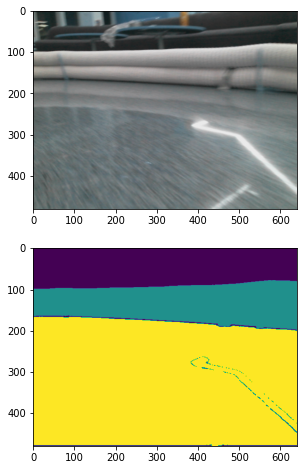

In [12]:
visualize(image, mask)

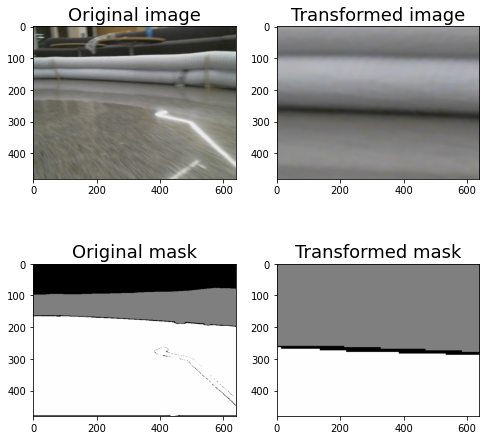

In [51]:
aug = A.RandomSizedCrop(min_max_height=(100, 100), height=original_height, width=original_width, p=1)

random.seed()
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

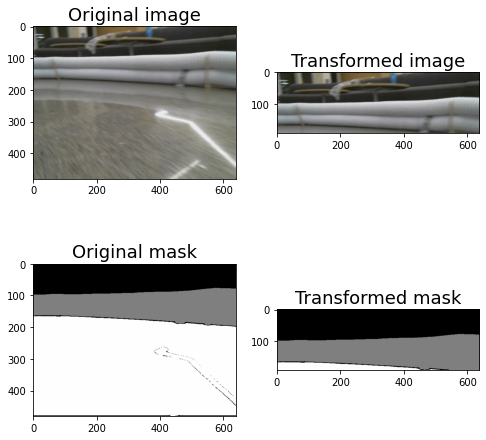

In [60]:
aug = A.RandomCropFromBorders(crop_left=0.2, crop_right=0.2, crop_top=0.2, crop_bottom=0.7, p=1)

random.seed()
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

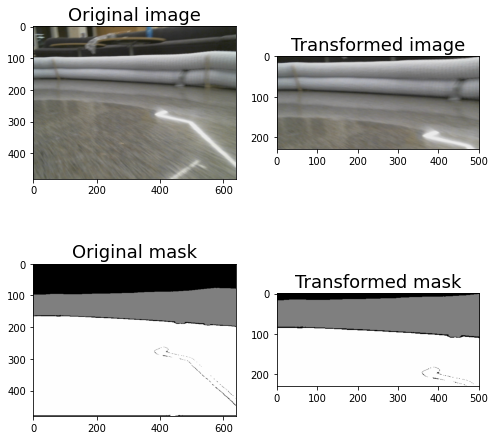

In [63]:
aug = A.OneOf([A.RandomSizedCrop(min_max_height=(100, 100), height=original_height, width=original_width, p=1), A.RandomCropFromBorders(crop_left=0.2, crop_right=0.2, crop_top=0.2, crop_bottom=0.7, p=1)], p=1)

random.seed()
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

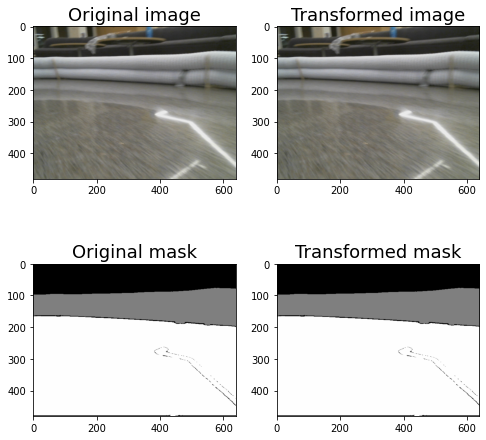

In [9]:
aug = A.RandomBrightnessContrast()
random.seed()
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

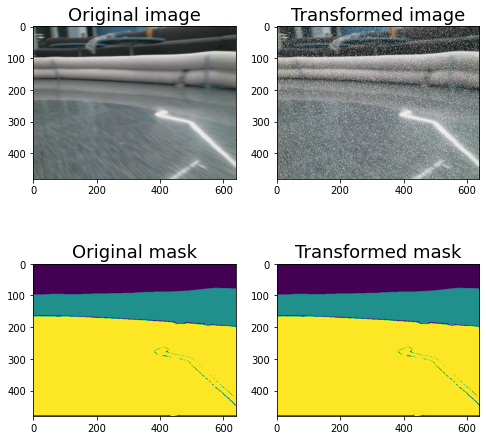

In [7]:
aug = A.PixelDropout(dropout_prob=0.1, per_channel=False, drop_value=255, mask_drop_value=None, p=1) 
random.seed()
augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)